[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HongB1/2022-KHU-Bioinformatics-lab/blob/master/code/C6_Pandas.ipynb)

**도구 - 판다스(pandas)**

`pandas` 라이브러리는 사용하기 쉬운 고성능 데이터 구조와 데이터 분석 도구를 제공합니다. 주 데이터 구조는 `DataFrame`입니다. 이를 인-메모리(in-memory) 2D 테이블로 생각할 수 있습니다(열 이름과 행 레이블이 있는 스프레드시트와 비슷합니다). 엑셀에 있는 많은 기능을 프로그램에서 사용할 수 있습니다. 여기에는 피봇 테이블이나 다른 열을 기반으로 열을 계산하고 그래프 출력하는 기능 등이 포함됩니다. 열 값으로 행을 그룹핑할 수도 있습니다. 또한 SQL과 비슷하게 테이블을 조인할 수 있습니다. 판다스는 시계열 데이터를 다루는데도 뛰어납니다.*

In [190]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# 설정

먼저 `pandas`를 임포트합니다. 보통 `pd`로 임포트합니다:

In [1]:
import pandas as pd

# `Series` 객체

`pandas` 라이브러리는 다음과 같은 유용한 데이터 구조를 포함하고 있습니다:

* `Series` 객체를 곧 이어서 설명하겠습니다. `Series` 객체는 1D 배열입니다. (열 이름과 행 레이블을 가진) 스프레드시트의 열과 비슷합니다.
* `DataFrame` 객체는 2D 테이블입니다. (열 이름과 행 레이블을 가진) 스프레드시트와 비슷합니다.

## `Series` 만들기

첫 번째 `Series` 객체를 만들어 보죠!

In [2]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## 1D `ndarray`와 비슷합니다

`Series` 객체는 넘파이 `ndarray`와 비슷하게 동작합니다. 넘파이 함수에 매개변수로 종종 전달할 수 있습니다:

In [3]:
import numpy as np
np.exp(s)
s

0    2
1   -1
2    3
3    5
dtype: int64

`Series` 객체에 대한 산술 연산도 가능합니다. `ndarray`와 비슷하게 *원소별*로 적용됩니다:

In [4]:
s + [1000,2000,3000,4000]


0    1002
1    1999
2    3003
3    4005
dtype: int64

넘파이와 비슷하게 `Series`에 하나의 숫자를 더하면 `Series`에 있는 모든 원소에 더해집니다. 이를 *브로드캐스팅*(broadcasting)이라고 합니다:

In [5]:
print(s)
s + 1000

0    2
1   -1
2    3
3    5
dtype: int64


0    1002
1     999
2    1003
3    1005
dtype: int64

`*`나 `/` 같은 모든 이항 연산과 심지어 조건 연산에서도 마찬가지입니다:

In [6]:
s[s < 0]

1   -1
dtype: int64

## 인덱스 레이블

`Series` 객체에 있는 각 원소는 *인덱스 레이블*(index label)이라 불리는 고유한 식별자를 가지고 있습니다. 기본적으로 `Series`에 있는 원소의 순서입니다(`0`에서 시작합니다). 하지만 수동으로 인덱스 레이블을 지정할 수도 있습니다:

In [7]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

그다음 `dict`처럼 `Series`를 사용할 수 있습니다:

In [8]:
s2["bob"]

83

일반 배열처럼 정수 인덱스를 사용하여 계속 원소에 접근할 수 있습니다:

In [9]:
s2[1]

83

레이블이나 정수를 사용해 접근할 때 명확하게 하기 위해 레이블은 `loc` 속성을 사용하고 정수는 `iloc` 속성을 사용하는 것이 좋습니다:

In [10]:
s2.loc["bob"]

83

In [11]:
s2.iloc[1]

83

`Series`는 인덱스 레이블을 슬라이싱할 수도 있습니다:

In [12]:
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [13]:
s2.iloc[0:3]

alice       68
bob         83
charles    112
dtype: int64

기본 정수 레이블을 사용할 때 예상 외의 결과를 만들 수 있기 때문에 주의해야 합니다:

In [14]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [15]:
surprise_slice = surprise[2:]
surprise_slice.reset_index(drop=True, inplace=True)

보세요. 첫 번째 원소의 인덱스 레이블이 `2`입니다. 따라서 슬라이싱 결과에서 인덱스 레이블 `0`인 원소는 없습니다:

In [16]:
display(surprise_slice)
surprise_slice[0]

0    1002
1    1003
dtype: int64

1002

In [17]:
try:
    surprise_slice[0]
except KeyError as e:
    print("키 에러:", e)

하지만 `iloc` 속성을 사용해 정수 인덱스로 원소에 접근할 수 있습니다. `Series` 객체를 사용할 때 `loc`와 `iloc`를 사용하는 것이 좋은 이유입니다:

In [18]:
surprise_slice.iloc[0]

1002

## `dict`에서 초기화

`dict`에서 `Series` 객체를 만들 수 있습니다. 키는 인덱스 레이블로 사용됩니다:

In [19]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

`Series`에 포함할 원소를 제어하고 `index`를 지정하여 명시적으로 순서를 결정할 수 있습니다:

In [20]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## 자동 정렬

여러 개의 `Series` 객체를 다룰 때 `pandas`는 자동으로 인덱스 레이블에 따라 원소를 정렬합니다.

In [21]:
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [22]:
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [23]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

만들어진 `Series`는 `s2`와 `s3`의 인덱스 레이블의 합집합을 담고 있습니다. `s2`에 `"colin"`이 없고 `s3`에 `"charles"`가 없기 때문에 이 원소는 `NaN` 값을 가집니다(Not-a-Number는 *누락*이란 의미입니다).

자동 정렬은 구조가 다고 누락된 값이 있는 여러 데이터를 다룰 때 매우 편리합니다. 하지만 올바른 인덱스 레이블을 지정하는 것을 잊는다면 원치않는 결과를 얻을 수 있습니다:

In [24]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)
print(s5)
s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]
0    1000
1    1000
2    1000
3    1000
dtype: int64


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

레이블이 하나도 맞지 않기 때문에 판다스가 이 `Series`를 정렬할 수 없습니다. 따라서 모두 `NaN`이 되었습니다.

## 스칼라로 초기화

스칼라와 인덱스 레이블의 리스트로 `Series` 객체를 초기화할 수도 있습니다: 모든 원소가 이 스칼라 값으로 설정됩니다.

In [25]:
import pandas as pd
import numpy as np

In [26]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series` 이름

`Series`는 `name`을 가질 수 있습니다:

In [27]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## `Series` 그래프 출력

맷플롯립을 사용해 `Series` 데이터를 쉽게 그래프로 출력할 수 있습니다(맷플롯립에 대한 자세한 설명은 [맷플롯립 튜토리얼](tools_matplotlib.ipynb)을 참고하세요). 맷플롯립을 임포트하고 `plot()` 메서드를 호출하면 끝입니다:

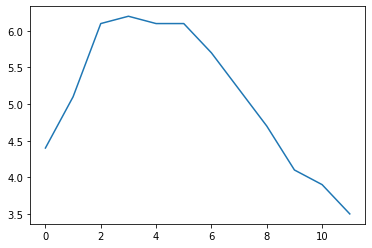

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

데이터를 그래프로 출력하는데 많은 *옵션*이 있습니다. 여기에서 모두 나열할 필요는 없습니다. 특정 종류의 그래프(히스토그램, 파이 차트 등)가 필요하면 판다스 문서의 [시각화](http://pandas.pydata.org/pandas-docs/stable/visualization.html) 섹션에서 예제 코드를 참고하세요.

In [29]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

이 `DatetimeIndex`를 `Series`의 인덱스로 사용할수 있습니다:

In [30]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

이 시리즈를 그래프로 출력해 보죠:

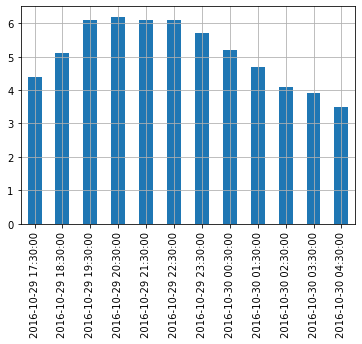

In [31]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

# `DataFrame` 객체

데이터프레임 객체는 스프레드시트를 표현합니다. 셀 값, 열 이름, 행 인덱스 레이블을 가집니다. 다른 열을 바탕으로 열을 계산하는 식을 쓸 수 있고 피봇 테이블을 만들고, 행을 그룹핑하고, 그래프를 그릴 수 있습니다. `DataFrame`을 `Series`의 딕셔너리로 볼 수 있습니다.

## `DataFrame` 만들기

`Series` 객체의 딕셔너리를 전달하여 데이터프레임을 만들 수 있습니다:

In [32]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


몇가지 알아 두어야 할 것은 다음과 같습니다:

* `Series`는 인덱스를 기반으로 자동으로 정렬됩니다.
* 누란된 값은 `NaN`으로 표현됩니다.
* `Series` 이름은 무시됩니다(`"year"`란 이름은 삭제됩니다).
* `DataFrame`은 주피터 노트북에서 멋지게 출력됩니다!

예상하는 방식으로 열을 참조할 수 있고 `Serires` 객체가 반환됩니다:

In [33]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

동시에 여러 개의 열을 선택할 수 있습니다:

In [34]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


열 리스트나 행 인덱스 레이블을 `DataFrame` 생성자에 전달하면 해당 열과 행으로 채워진 데이터프레임이 반환됩니다. 예를 들면:

In [35]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


`DataFrame`을 만드는 또 다른 편리한 방법은 `ndarray`나 리스트의 리스트로 모든 값을 생성자에게 전달하고 열 이름과 행 인덱스 레이블을 각기 지정하는 것입니다:

In [36]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


누락된 값을 지정하려면 `np.nan`이나 넘파이 마스크 배열을 사용합니다:

`ndarray` 대신에 `DataFrame` 객체를 전달할 수도 있습니다:

In [37]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3.0


딕셔너리의 딕셔너리(또는 리스트의 리스트)로 `DataFrame`을 만들 수 있습니다:

In [38]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## 멀티 인덱싱

모든 열이 같은 크기의 튜플이면 멀티 인덱스로 인식합니다. 열 인덱스 레이블에도 같은 방식이 적용됩니다. 예를 들면:

In [39]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

이제 `"public"` 열을 모두 담은 `DataFrame`을 손쉽게 만들 수 있습니다:

In [40]:
d5["public"]

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [41]:
d5["public", "hobby"]  # d5["public"]["hobby"]와 같습니다.

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

In [42]:
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

## 전치

`T` 속성을 사용해 열과 인덱스를 바꿀 수 있습니다:

In [43]:
d6 = d5.T
d6

Paris           London
                    alice      bob charles
public  birthyear    1985     1984    1992
        hobby      Biking  Dancing     NaN
private weight         68       83     112
        children      NaN      3.0     0.0

## 행 참조하기

`people` `DataFrame`으로 돌아가 보죠:

In [44]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


`loc` 속성으로 열 대신 행을 참조할 수 있습니다. `DataFrame`의 열 이름이 행 인덱스 레이블로 매핑된 `Series` 객체가 반환됩니다:

In [45]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

`iloc` 속성을 사용해 정수 인덱스로 행을 참조할 수 있습니다:

In [46]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

행을 슬라이싱할 수 있으며 `DataFrame` 객체가 반환됩니다:

In [47]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


마자믹으로 불리언 배열을 전달하여 해당하는 행을 가져올 수 있습니다:

In [48]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


불리언 표현식을 사용할 때 아주 유용합니다:

In [49]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


## 열 추가, 삭제

`DataFrame`을 `Series`의 딕셔너리처럼 다룰 수 있습니다. 따라서 다음 같이 쓸 수 있습니다:

In [50]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [51]:
people["age"] = 2022 - people["birthyear"]  # "age" 열을 추가합니다
people["over 30"] = people["age"] > 30      # "over 30" 열을 추가합니다
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,37,True
bob,Dancing,83,38,True
charles,NaN,112,30,False


In [52]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

새로운 열을 추가할 때 행의 개수는 같아야 합니다. 누락된 행은 `NaN`으로 채워지고 추가적인 행은 무시됩니다:

In [53]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice 누락됨, eugene은 무시됨
people

,hobby,weight,age,over 30,pets
alice,Biking,68,37,True,NaN
bob,Dancing,83,38,True,0.0
charles,NaN,112,30,False,5.0


새로운 열을 추가할 때 기본적으로 (오른쪽) 끝에 추가됩니다. `insert()` 메서드를 사용해 다른 곳에 열을 추가할 수 있습니다:

In [54]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,37,True,NaN
bob,Dancing,181,83,38,True,0.0
charles,NaN,185,112,30,False,5.0


### `apply` 함수 적용하기 => 축 기준
```python
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=())
```
- `func` : 각 행이나 열에 적용할 함수 입니다.
- `axis` : {0 : Index / 1 : columns} 함수를 적용할 축 입니다.
- `row` : {True : ndarray / False : Series} 함수에 전달할 축의 형식입니다.    
  True면 ndarray형태로 전달하고 False면 Series형태로 전달합니다. 기본적으로 Series입니다.
- `result_type` : {expand / reduce / broadcast} 반환값의 형태를 결정합니다. expand이면 배열 형태를 기준으로 열을 확장합니다.(기본 인덱스로), reduce인 경우는 그대로 Serise형태로 반환합니다.    
  broadcase인 경우 기존 열 형식대로 확장하여 반환합니다.(열의 수가 같아야합니다.)



In [55]:
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,37,True,NaN
bob,Dancing,181,83,38,True,0.0
charles,NaN,185,112,30,False,5.0


In [56]:
import numpy as np
print('axis=0 -> Index 기준으로 연산:\n', people[['height', 'weight']].apply(np.sum, axis=0))
print()
print('axis=1 -> Index 기준으로 연산:\n', people[['height', 'weight']].apply(np.sum, axis=1))

axis=0 -> Index 기준으로 연산:
 height    538
weight    263
dtype: int64

axis=1 -> Index 기준으로 연산:
 alice      240
bob        264
charles    297
dtype: int64


### `applymap` 함수 적용하기 => 요소별
```python
DataFrame.applymap(func, na_action=None, **kwargs)
```
applymap 메서드는 객체의 각 요소에 함수를 적용하는 메서드입니다.  <br>
즉, apply메서드와는 다르게 DataFrame의 각 요소 하나하나에 함수를 적용하여 스칼라 값을 반환합니다.


- `func` : 단일 값을 반환하는 함수입니다.
- `na_action` : {None / 'ignore} NaN의 무시 여부입니다. 'ignore'이면 NaN을 함수로 전달하지 않습니다.


In [57]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = [[1,2,3],[4,5,6],[7,pd.NA,9]]
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7  <NA>     9


In [58]:
print(df.applymap(lambda x : x**2, na_action='ignore'))

      col1  col2  col3
row1     1     4     9
row2    16    25    36
row3    49  <NA>    81


### apply 함수 사용 예제

In [59]:
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,37,True,NaN
bob,Dancing,181,83,38,True,0.0
charles,NaN,185,112,30,False,5.0


In [60]:
people["birthyear"] = 2022 - people["age"] 
people

,hobby,height,weight,age,over 30,pets,birthyear
alice,Biking,172,68,37,True,NaN,1985
bob,Dancing,181,83,38,True,0.0,1984
charles,NaN,185,112,30,False,5.0,1992


In [61]:
people['birthyear_'] = people['age'].apply(lambda x: 2022 - x)
people

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_
alice,Biking,172,68,37,True,NaN,1985,1985
bob,Dancing,181,83,38,True,0.0,1984,1984
charles,NaN,185,112,30,False,5.0,1992,1992


In [62]:
people['body_mass_index'] = people.apply(lambda x: x['weight'] / (x['height'] / 100) ** 2, axis=1)
people

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_,body_mass_index
alice,Biking,172,68,37,True,NaN,1985,1985,22.985398
bob,Dancing,181,83,38,True,0.0,1984,1984,25.335002
charles,NaN,185,112,30,False,5.0,1992,1992,32.724617


In [63]:
def BMI(df):
    result = df['weight'] / (df['height']/100) ** 2
    return result
    
people['BMI'] = people.apply(BMI, axis=1)
people

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_,body_mass_index,BMI
alice,Biking,172,68,37,True,NaN,1985,1985,22.985398,22.985398
bob,Dancing,181,83,38,True,0.0,1984,1984,25.335002,25.335002
charles,NaN,185,112,30,False,5.0,1992,1992,32.724617,32.724617


In [64]:
overweight_threshold = 30
people['overweight'] = people.apply(lambda x: 1 if x['body_mass_index'] > overweight_threshold else 0, axis=1)
people

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_,body_mass_index,BMI,overweight
alice,Biking,172,68,37,True,NaN,1985,1985,22.985398,22.985398,0
bob,Dancing,181,83,38,True,0.0,1984,1984,25.335002,25.335002,0
charles,NaN,185,112,30,False,5.0,1992,1992,32.724617,32.724617,1


In [65]:
people

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_,body_mass_index,BMI,overweight
alice,Biking,172,68,37,True,NaN,1985,1985,22.985398,22.985398,0
bob,Dancing,181,83,38,True,0.0,1984,1984,25.335002,25.335002,0
charles,NaN,185,112,30,False,5.0,1992,1992,32.724617,32.724617,1


In [66]:
people[people['overweight']==1]

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_,body_mass_index,BMI,overweight
charles,NaN,185,112,30,False,5.0,1992,1992,32.724617,32.724617,1


### `eval` 문자열 형식의 계산식 적용
```python
DataFrame.eval(expr, inplace=False, kwargs)
```
eval메서드는 파이썬의 eval 메서드와 사용목적이 동일합니다. 문자열로 된 계산식을 적용합니다.

- `expr` : 문자열 형태의 계산식입니다. <br>
  - `'@'`를 접두어로 사용하여 지역 변수나 전역 변수를 참조할 수 있습니다:
- `inplace` : {True / False} 계산된 값이 원본을 변경할지의 여부입니다. 기본적으로 원본은 변경되지 않습니다.

In [67]:
people.eval("is_overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_,body_mass_index,BMI,overweight,is_overweight
alice,Biking,172,68,37,True,NaN,1985,1985,22.985398,22.985398,0,False
bob,Dancing,181,83,38,True,0.0,1984,1984,25.335002,25.335002,0,False
charles,NaN,185,112,30,False,5.0,1992,1992,32.724617,32.724617,1,True


In [68]:
data = [[1,2,3],[4,5,6],[7,8,9]]
col = ['col1','col2','col3']
row = ['row1','row2','row3']
df = pd.DataFrame(data = data, index = row, columns= col)
df

,col1,col2,col3
row1,1,2,3
row2,4,5,6
row3,7,8,9


In [69]:
df.eval('col4=(col1**2)+col3-col2')
df

,col1,col2,col3
row1,1,2,3
row2,4,5,6
row3,7,8,9


In [70]:
df.eval('col4=(col1**2)+col3-col2', inplace=True)
df

,col1,col2,col3,col4
row1,1,2,3,2
row2,4,5,6,17
row3,7,8,9,50


### `query` 사용하기
```python
DataFrame.query(expr, inplace=False, **kwargs)
```
Query the columns of a DataFrame with a boolean expression.

- `expr` : 문자열 형태의 계산식입니다.
- `inplace` : {True / False} 계산된 값이 원본을 변경할지의 여부입니다. 기본적으로 원본은 변경되지 않습니다.

In [71]:
df = pd.DataFrame({'A': range(1, 6),
                   'B': range(10, 0, -2),
                   'C': range(10, 5, -1)})
df

,A,B,C
0,1,10,10
1,2,8,9
2,3,6,8
3,4,4,7
4,5,2,6


In [72]:
df[df.A > df.B]

,A,B,C
4,5,2,6


In [73]:
df.query('A > B')

,A,B,C
4,5,2,6


In [74]:
people.eval("is_overweight = body_mass_index > @overweight_threshold", inplace=True)
people[people['is_overweight']]

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_,body_mass_index,BMI,overweight,is_overweight
charles,NaN,185,112,30,False,5.0,1992,1992,32.724617,32.724617,1,True


In [75]:
people.query("body_mass_index > @overweight_threshold")

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_,body_mass_index,BMI,overweight,is_overweight
charles,NaN,185,112,30,False,5.0,1992,1992,32.724617,32.724617,1,True


In [76]:
people

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_,body_mass_index,BMI,overweight,is_overweight
alice,Biking,172,68,37,True,NaN,1985,1985,22.985398,22.985398,0,False
bob,Dancing,181,83,38,True,0.0,1984,1984,25.335002,25.335002,0,False
charles,NaN,185,112,30,False,5.0,1992,1992,32.724617,32.724617,1,True


In [77]:
people.query("body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,birthyear,birthyear_,body_mass_index,BMI,overweight,is_overweight
charles,NaN,185,112,30,False,5.0,1992,1992,32.724617,32.724617,1,True


## `DataFrame` 연산

`DataFrame`이 넘파이 배열을 흉내내려는 것은 아니지만 몇 가지 비슷한 점이 있습니다. 예제 `DataFrame`을 만들어 보죠:

In [78]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, 
        columns=["sep", "oct", "nov"], 
        index=["alice", "bob", "charles", "darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


`DataFrame`에 넘파이 수학 함수를 적용하면 모든 값에 이 함수가 적용됩니다:

In [79]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


비슷하게 `DataFrame`에 하나의 값을 더하면 `DataFrame`의 모든 원소에 이 값이 더해집니다. 이를 *브로드캐스팅*이라고 합니다:

In [80]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


물론 산술 연산(`*`,`/`,`**`...)과 조건 연산(`>`, `==`...)을 포함해 모든 이항 연산에도 마찬가지 입니다:

In [81]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


`DataFrame`의 `max`, `sum`, `mean` 같은 집계 연산은 각 열에 적용되어 `Series` 객체가 반환됩니다:

In [82]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

`all` 메서드도 집계 연산입니다: 모든 값이 `True`인지 아닌지 확인합니다. 모든 학생의 점수가 `5` 이상인 월을 찾아 보죠:

In [83]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [84]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

`any` 메서드는 하나라도 참이면 `True`를 반환합니다. 한 번이라도 10점을 받은 사람을 찾아 보죠:

In [85]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

`DataFrame`에 `Series` 객체를 더하면 (또는 다른 이항 연산을 수행하면) 판다스는 `DataFrame`에 있는 모든 *행*에 이 연산을 브로드캐스팅합니다. 이는 `Series` 객체가 `DataFrame`의 행의 개수와 크기가 같을 때만 동작합니다. 예를 들어 `DataFrame`의 `mean`(`Series` 객체)을 빼보죠:

In [86]:
grades - grades.mean()  # grades - [7.75, 8.75, 7.50] 와 동일

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


모든 9월 성적에서 `7.75`를 빼고, 10월 성적에서 `8.75`를 빼고, 11월 성적에서 `7.50`을 뺍니다. 이는 다음 `DataFrame`을 빼는 것과 같습니다:

In [87]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


모든 성적의 전체 평균을 빼고 싶다면 다음과 같은 방법을 사용합니다:

In [88]:
grades - grades.values.mean() # 모든 점수에서 전체 평균(8.00)을 뺍니다

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## 자동 정렬

`Series`와 비슷하게 여러 개의 `DataFrame`에 대한 연산을 수행하면 판다스는 자동으로 행 인덱스 레이블로 정렬하지만 열 이름으로도 정렬할 수 있습니다. 10월부터 12월까지 보너스 포인트를 담은 `DataFrame`을 만들어 보겠습니다:

In [89]:
bonus_array = np.array([[0,np.nan,2], 
                        [np.nan,1,0], 
                        [0, 1, 0], 
                        [3, 3, 0]])

bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [90]:
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [91]:
new_grades = grades + bonus_points
new_grades

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [92]:
new_grades

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


덧셈 연산이 수행되었지만 너무 많은 원소가 `NaN`이 되었습니다. `DataFrame`을 정렬할 때 일부 열과 행이 한 쪽에만 있기 때문입니다. 다른 쪽에는 누란되었다고 간주합니다(`NaN`). `NaN`에 어떤 수를 더하면 `NaN`이 됩니다.

## 결측값 확인(isna, isnull, notna, notnull)
```python
DataFrame.isna()
DataFrame.isnull()
```

```python
DataFrame.notna()
DataFrame.notnull()
```
`isna` 메서드와 `notna` 메서드는 DataFrame내의 결측값을 확인해서 `bool`형식으로 반환하는 메서드입니다. <br>
`isna`의 경우 결측값이면 `True` 반환, 정상값이면 `False`반환이며, <br>
`notna`의 경우 결측값이면 `False` 반환, 정상값이면 `True`를 반환합니다. <br>



In [93]:
new_grades.isna()

,dec,nov,oct,sep
alice,True,True,True,True
bob,True,True,False,True
charles,True,False,False,True
colin,True,True,True,True
darwin,True,False,False,True


In [94]:
new_grades.isna().sum()

dec    5
nov    3
oct    2
sep    5
dtype: int64

In [95]:
new_grades.notna()

,dec,nov,oct,sep
alice,False,False,False,False
bob,False,False,True,False
charles,False,True,True,False
colin,False,False,False,False
darwin,False,True,True,False


In [96]:
print(new_grades.notna().sum()) # sum()의 default는 열을 기준입니다.
print()
print(new_grades.notna().sum(1)) # 행을 기준으로 하고 싶을 땐 이렇게! 

dec    0
nov    2
oct    3
sep    0
dtype: int64

alice      0
bob        1
charles    2
colin      0
darwin     2
dtype: int64


### DataFrame.dropna : 결측값 자체를 제거
```python
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
```
#### 개요
dropna 메서드는 DataFramde내의 결측값이 포함된 레이블을 제거하는 메서드입니다. <br>

#### 사용법
- `axis` : {0: index / 1: columns} 결측치 제거를 진행 할 레이블입니다.
- `how` : {'any' : 존재하면 제거 / 'all' : 모두 결측치면 제거} 제거할 유형입니다. 포함만 시켜도 제거할지, 전무 NA여야 제거할지 정할 수 있습니다.
- `tresh` : 결측값이 아닌 값이 몇 개 미만일 경우에만 적용시키는 인수 입니다. 
  예를들어, tresh값이 3이라면 결측값이 아닌 값이 3개 미만일 경우에만 dropna메서드를 수행합니다.
- `subset` : dropna메서드를 수행할 레이블을 지정합니다.
- `inplace` : 원본을 변경할지의 여부입니다.

In [97]:
col  = ['col1','col2','col3','col4','col5']
row  = ['row1','row2','row3','row4']
data = [[1,2,3,pd.NA,5], 
        [6,pd.NA,8,pd.NA,10], 
        [11,12,13,14,15],
        [pd.NA,pd.NA,pd.NA,pd.NA,pd.NA]]
df = pd.DataFrame(data,row,col)
print(df)

      col1  col2  col3  col4  col5
row1     1     2     3  <NA>     5
row2     6  <NA>     8  <NA>    10
row3    11    12    13    14    15
row4  <NA>  <NA>  <NA>  <NA>  <NA>


In [98]:
# axis=0 => 행에 대해서 결측치가 있는 행을 모두 drop 
df.dropna(axis=0)

,col1,col2,col3,col4,col5
row3,11,12,13,14,15


In [99]:
# axis=1 => 열에 대해서
df.dropna(axis=1)

""
row1
row2
row3
row4


In [100]:
# subset으로 체크할 컬럼 지정 가능, axis=0(default)
df.dropna(subset=['col1', 'col2'])

,col1,col2,col3,col4,col5
row1,1,2,3,<NA>,5
row3,11,12,13,14,15


In [101]:
new_grades

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [102]:
new_grades.dropna()

,dec,nov,oct,sep


new_grades에 `dropna`를 사용했더니 남는 데이터가 없게 되네요. <br>
그렇다면 결측치가 있는 행이나 열을 모조리 지워버리는 `dropna`가 아니라, 결측치를 다른 값으로 바꿔주는 `fillna` 메서드를 배워봅시다.<br>
<br>위 데이터에 있는 문제를 해결해 보죠. 예를 들어, 누락된 데이터는 `NaN`이 아니라 0이 되어야 한다고 결정할 수 있습니다. `fillna()` 메서드를 사용해 모든 `NaN` 값을 어떤 값으로 바꿀 수 있습니다:


### `DataFrame.fillna`

```python
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
```
#### 개요
fillna 메서드는 DataFrame에서 결측값을 원하는 값으로 변경하는 메서드입니다.

#### 사용법
- `value` : 결측값을 대체할 값입니다. dict형태로도 가능합니다.
- `method` : 결측값을 변경할 방식입니다. 
  - `bfill`로 할경우 결측값을 바로 아래 값과 동일하게 변경합니다. 
  - `ffill`로 할 경우 결측값을 바로 위 값과 동일하게 변경합니다.
- `axis` : {0 : index / 1 : columns} `fillna` 메서드를 적용할 레이블입니다.
- `inplace` : 원본을 변경할지 여부입니다. True일 경우 원본을 변경하게 됩니다.

In [103]:
df

,col1,col2,col3,col4,col5
row1,1,2,3,<NA>,5
row2,6,<NA>,8,<NA>,10
row3,11,12,13,14,15
row4,<NA>,<NA>,<NA>,<NA>,<NA>


In [104]:
df.fillna(0)

,col1,col2,col3,col4,col5
row1,1,2,3,0,5
row2,6,0,8,0,10
row3,11,12,13,14,15
row4,0,0,0,0,0


In [105]:
new_grades

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [106]:
new_grades.fillna(0) # NaN자리에 0을 넣었음

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


9월의 점수를 0으로 만드는 것은 공정하지 않습니다. 누락된 점수는 그대로 두고, 누락된 보너스 포인트는 0으로 바꿀 수 있습니다:

In [107]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [108]:
fixed_bonus_points = bonus_points.fillna(0) # bonus_points에서 NaN인 값에 대해 0을 추가
fixed_bonus_points.insert(0, "sep", 0) # bonus_points에 9월도 값이 없어서 연산하면 NaN이 되므로 0값을 넣어서 열 추가 
fixed_bonus_points.loc["alice"] = 0 # 마찬가지로 alice 컬럼에도
fixed_bonus_points

,sep,oct,nov,dec
bob,0,0.0,0.0,2.0
colin,0,0.0,1.0,0.0
darwin,0,0.0,1.0,0.0
charles,0,3.0,3.0,0.0
alice,0,0.0,0.0,0.0


In [109]:
new_grades = grades + fixed_bonus_points
new_grades

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


훨씬 낫네요: 일부 데이터를 꾸며냈지만 덜 불공정합니다.<br>
하지만 12월과 colin을 drop하는게 낫겠네요.


In [110]:
new_grades.dropna()

,dec,nov,oct,sep


In [111]:
final_grades = new_grades.dropna(how="all") # axis default=0
final_grades

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
darwin,NaN,11.0,10.0,9.0


그다음 `axis` 매개변수를 `1`로 지정하여 모두 `NaN`인 열을 삭제합니다:

In [112]:
final_grades = final_grades.dropna(how="all", axis=1)
final_grades

,nov,oct,sep
alice,9.0,8.0,8.0
bob,9.0,9.0,10.0
charles,5.0,11.0,4.0
darwin,11.0,10.0,9.0


## `DataFrame` 정렬

### 1. `sort_values` : 값 기준 정렬 
```python
DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
```
#### 개요
`sort_values` 메서드는 값을 기준으로 레이블을 정렬하는 메서드입니다.

#### 사용법
- `by` : str or list, 정렬 기준이될 레이블입니다. 
- `ascending` : bool(True, or False), 기본값은 True로 오름차순이다.
- `axis` : {0 : index / 1: columns} 정렬할 레이블입니다. 0이면 행, 1이면 열을 기준으로 정렬합니다.
- `inplace` : 원본을 대체할지 여부입니다. True일 경우 원본을 대체하게 됩니다.
- `ignore_index` : 인덱스의 무시 여부입니다. True일 경우 인덱스의 순서와 상관없이 0,1,2,... 로 정해집니다.
- `key` : 이 인수를 통해 정렬방식으로 함수를 사용할 수 있습니다. `lambda`의 사용이 가능합니다.

In [113]:
# sep을 기준으로 정렬,
final_grades.sort_values(by='sep')

,nov,oct,sep
charles,5.0,11.0,4.0
alice,9.0,8.0,8.0
darwin,11.0,10.0,9.0
bob,9.0,9.0,10.0


In [114]:
# sep을 기준으로 정렬
final_grades.sort_values(by='sep', ascending=False)

,nov,oct,sep
bob,9.0,9.0,10.0
darwin,11.0,10.0,9.0
alice,9.0,8.0,8.0
charles,5.0,11.0,4.0


In [115]:
# sep, oct, nov 기준으로 정렬
final_grades.sort_values(by=['sep', 'oct', 'nov'], ascending=True)

,nov,oct,sep
charles,5.0,11.0,4.0
alice,9.0,8.0,8.0
darwin,11.0,10.0,9.0
bob,9.0,9.0,10.0


### 2. `sort_index`: 인덱스 기준 정렬 
`sort_index` 메서드를 호출하여 `DataFrame`을 정렬할 수 있습니다. 기본적으로 인덱스 레이블을 기준으로 오름차순으로 행을 정렬합니다. 여기에서는 내림차순으로 정렬해 보죠:

```python
DataFrame.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)
```

#### 개요
sort_index 메서드는 인덱스를 기준으로 레이블을 정렬하는 메서드입니다.

#### 사용법
- `axis` : {0 : index / 1: columns} 정렬할 레이블입니다. 0이면 행, 1이면 열을 기준으로 정렬합니다.
- `ascending` : 오름차순으로할지 여부 입니다. 기본은 True로 오름차순입니다.
- `inplace` : 원본을 대체할지 여부입니다. True일 경우 원본을 대체하게 됩니다.
- `ignore_index` : 인덱스의 무시 여부입니다. True일 경우 인덱스의 순서와 상관없이 0,1,2,... 로 정해집니다.

In [116]:
final_grades.sort_index()

,nov,oct,sep
alice,9.0,8.0,8.0
bob,9.0,9.0,10.0
charles,5.0,11.0,4.0
darwin,11.0,10.0,9.0


In [117]:
final_grades.sort_index(ascending=False)

,nov,oct,sep
darwin,11.0,10.0,9.0
charles,5.0,11.0,4.0
bob,9.0,9.0,10.0
alice,9.0,8.0,8.0


## `groupby`로 집계하기
```python
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)
```
#### 개요
groupby 메서드는 데이터를 그룹화하여 연산을 수행하는 메서드 입니다.

#### 사용법
- `by` : 그룹화할 내용입니다. 함수, 축, 리스트 등등이 올 수 있습니다.
- `axis` : 그룹화를 적용할 축입니다.
- `level` : 멀티 인덱스의 경우 레벨을 지정할 수 있습니다.
- `as_index` : 그룹화할 내용을 인덱스로 할지 여부입니다. False이면 기존 인덱스가 유지됩니다.
- `sort` : 그룹키를 정렬할지 여부입니다.
- `group_keys` : apply메서드 사용시 결과에따라 그룹화 대상인 열이 인덱스와 중복(group key)이 될 수 있습니다. 이 때, group_keys=False로 인덱스를 기본값으로 지정할 수 있습니다.
- `squeeze` : 결과가 1행 or 1열짜리 데이터일 경우 Series로, 1행&1열 짜리 데이터일 경우 스칼라로 출력합니다.
- `observed` : Categorical로 그룹화 할 경우 Categorical 그룹퍼에 의해 관찰된 값만 표시할 지 여부입니다.
- `dropna` : 결측값을 계산에서 제외할지 여부입니다.



In [118]:
idx=['A','A','B','B','B','C','C','C','D','D','D','D','E','E','E']
col=['col1','col2','col3']
data = np.random.randint(0,9,(15,3))
df = pd.DataFrame(data=data, index=idx, columns=col).reset_index()
df

,index,col1,col2,col3
0,A,7,0,2
1,A,7,5,1
2,B,2,4,5
3,B,8,7,5
4,B,5,2,2
5,C,3,1,3
6,C,3,0,4
7,C,2,7,3
8,D,6,8,0
9,D,7,7,0


In [119]:
# index 컬럼을 기준으로 groupby 수행 => 결과: DataFrameGroupBy 객체 생성
df_groupy_by_index = df.groupby(by='index')
df_groupy_by_index

In [120]:
df_groupy_by_index.count()

,col1,col2,col3
index,,,
A,2,2,2
B,3,3,3
C,3,3,3
D,4,4,4
E,3,3,3


In [121]:
df_groupy_by_index.mean()

,col1,col2,col3
index,,,
A,7.000000,2.500000,1.500000
B,5.000000,4.333333,4.000000
C,2.666667,2.666667,3.333333
D,5.250000,5.750000,1.750000
E,5.333333,0.666667,3.000000


In [122]:
df_groupy_by_index.agg(['count', 'sum', 'mean'])

col1                col2                col3              
      count sum      mean count sum      mean count sum      mean
index                                                            
A         2  14  7.000000     2   5  2.500000     2   3  1.500000
B         3  15  5.000000     3  13  4.333333     3  12  4.000000
C         3   8  2.666667     3   8  2.666667     3  10  3.333333
D         4  21  5.250000     4  23  5.750000     4   7  1.750000
E         3  16  5.333333     3   2  0.666667     3   9  3.000000

In [123]:
final_grades

,nov,oct,sep
alice,9.0,8.0,8.0
bob,9.0,9.0,10.0
charles,5.0,11.0,4.0
darwin,11.0,10.0,9.0


In [124]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing",]
final_grades

,nov,oct,sep,hobby
alice,9.0,8.0,8.0,Biking
bob,9.0,9.0,10.0,Dancing
charles,5.0,11.0,4.0,NaN
darwin,11.0,10.0,9.0,Dancing


hobby로 이 `DataFrame`을 그룹핑해 보죠:

In [125]:
grouped_grades = final_grades.groupby(by="hobby")
grouped_grades

In [126]:
grouped_grades.count()

,nov,oct,sep
hobby,,,
Biking,1,1,1
Dancing,2,2,2


In [127]:
grouped_grades.mean()

,nov,oct,sep
hobby,,,
Biking,9.0,8.0,8.0
Dancing,10.0,9.5,9.5


In [128]:
grouped_grades.agg(['count', 'mean'])

nov         oct        sep     
        count  mean count mean count mean
hobby                                    
Biking      1   9.0     1  8.0     1  8.0
Dancing     2  10.0     2  9.5     2  9.5

아주 쉽네요! 평균을 계산할 때 `NaN` 값은 그냥 무시됩니다.

판다스는 스프레드시트와 비슷하 [피봇 테이블](https://en.wikipedia.org/wiki/Pivot_table)을 지원하여 데이터를 빠르게 요약할 수 있습니다. 어떻게 동작하는 알아 보기 위해 간단한 `DataFrame`을 만들어 보면서 시작해봅시다. 

In [129]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [130]:
final_grades

,nov,oct,sep,hobby
alice,9.0,8.0,8.0,Biking
bob,9.0,9.0,10.0,Dancing
charles,5.0,11.0,4.0,NaN
darwin,11.0,10.0,9.0,Dancing


In [131]:
del final_grades['hobby']
final_grades

,nov,oct,sep
alice,9.0,8.0,8.0
bob,9.0,9.0,10.0
charles,5.0,11.0,4.0
darwin,11.0,10.0,9.0


In [132]:
more_grades = final_grades.stack().reset_index()
more_grades

,level_0,level_1,0
0,alice,nov,9.0
1,alice,oct,8.0
2,alice,sep,8.0
3,bob,nov,9.0
4,bob,oct,9.0
5,bob,sep,10.0
6,charles,nov,5.0
7,charles,oct,11.0
8,charles,sep,4.0
9,darwin,nov,11.0


In [133]:
more_grades.columns = ["name", "month", "grade"]
more_grades

,name,month,grade
0,alice,nov,9.0
1,alice,oct,8.0
2,alice,sep,8.0
3,bob,nov,9.0
4,bob,oct,9.0
5,bob,sep,10.0
6,charles,nov,5.0
7,charles,oct,11.0
8,charles,sep,4.0
9,darwin,nov,11.0


In [134]:
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,nov,9.0,NaN
1,alice,oct,8.0,NaN
2,alice,sep,8.0,NaN
3,bob,nov,9.0,0.0
4,bob,oct,9.0,NaN
5,bob,sep,10.0,2.0
6,charles,nov,5.0,3.0
7,charles,oct,11.0,3.0
8,charles,sep,4.0,0.0
9,darwin,nov,11.0,0.0


### 피봇변환(pivot)
```python
DataFrame.pivot(index=None, columns=None, values=None)
```
#### 개요
pivot메서드는 데이터의 열을 기준으로 피벗테이블로 변환시키는 메서드 입니다.

#### 사용법
- `index` : 인덱스로 사용될 열입니다.
- `columns` : 열로 사용될 열 입니다.
- `values` : 값으로 입력될 열 입니다. <br>
※ `index`나 `columns`에 리스트를 입력 할 경우 멀티 인덱스로 피벗테이블이 생성됩니다.<br>
`values`에 리스트를 입력 할 경우 각 값에 대한 테이블이 연속적으로 생성됩니다.

이제 이 `DataFrame`에 대해 `pd.pivot_table()` 함수를 호출하고 `name` 열로 그룹핑합니다. 기본적으로 `pivot_table()`은 수치 열의 평균을 계산합니다:


In [135]:
col = ['Machine','Country','Price','Brand']
data = [['TV','Korea',1000,'Samsung'],
        ['TV','Japan',1300,'LG'],
        ['TV','China',300,'Shaomi'],
        ['PC','Korea',2000,'Samsung'],
        ['PC','Japan',3000,'Sony'],
        ['PC','China',450,'Huawei']]
df = pd.DataFrame(data=data, columns=col)
df

,Machine,Country,Price,Brand
0,TV,Korea,1000,Samsung
1,TV,Japan,1300,LG
2,TV,China,300,Shaomi
3,PC,Korea,2000,Samsung
4,PC,Japan,3000,Sony
5,PC,China,450,Huawei


In [136]:
df.pivot(index='Machine', columns='Country',values='Price')

Country,China,Japan,Korea
Machine,,,
PC,450,3000,2000
TV,300,1300,1000


In [137]:
df.pivot(index='Machine',columns='Country',values=['Price','Brand']) # values 값이 list 형태일 경우 옆쪽으로 병렬하게 생성됨.

Price               Brand               
Country China Japan Korea   China Japan    Korea
Machine                                         
PC        450  3000  2000  Huawei  Sony  Samsung
TV        300  1300  1000  Shaomi    LG  Samsung

In [138]:
# 참고로, values를 따로 입력하지 않으면 남은 모든 열이 values에 입력되어 연속으로 출력됩니다.
df.pivot(index='Machine',columns='Country')

Price               Brand               
Country China Japan Korea   China Japan    Korea
Machine                                         
PC        450  3000  2000  Huawei  Sony  Samsung
TV        300  1300  1000  Shaomi    LG  Samsung

In [139]:
# 그 상태에서 [열 이름] 형태를 붙여서 원하는 values만 출력할 수 있습니다.
df.pivot(index='Machine',columns='Country')['Brand']

Country,China,Japan,Korea
Machine,,,
PC,Huawei,Sony,Samsung
TV,Shaomi,LG,Samsung


In [140]:
# multi-index로도 가능
df.pivot(index=['Country','Machine'],columns='Brand',values='Price')

Brand            Huawei      LG  Samsung  Shaomi    Sony
Country Machine                                         
China   PC        450.0     NaN      NaN     NaN     NaN
        TV          NaN     NaN      NaN   300.0     NaN
Japan   PC          NaN     NaN      NaN     NaN  3000.0
        TV          NaN  1300.0      NaN     NaN     NaN
Korea   PC          NaN     NaN   2000.0     NaN     NaN
        TV          NaN     NaN   1000.0     NaN     NaN

In [141]:
# multi-columns 로도 가능
df.pivot(index='Country',columns=['Machine','Brand'],values='Price')

Machine      TV                     PC               
Brand   Samsung      LG Shaomi Samsung    Sony Huawei
Country                                              
China       NaN     NaN  300.0     NaN     NaN  450.0
Japan       NaN  1300.0    NaN     NaN  3000.0    NaN
Korea    1000.0     NaN    NaN  2000.0     NaN    NaN

### `pivot_table`: 스프레드시트 기반 피벗생성
```python
DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
```
#### 개요
`pivot_table`메서드는 데이터를 스프레드시트 기반 피벗 테이블로 변환하는 메서드입니다.<br>
엑셀 스프레드시트 피벗 테이블과 유사한 기능을 합니다.

#### 사용법
- `values` : 값으로 입력될 열 입니다.
- `index` : 인덱스로 사용될 열입니다.
- `columns` : 열로 사용될 열 입니다.
- `aggfunc` : 결과로 출력될 함수 입니다.
- `fill_value` : 결측치를 채워넣을 값입니다.
- `margins` : 합계를 표시할지 여부입니다. True일 경우 새 열을 생성하여 합계를 출력합니다.
- `dropna` : 항목이 모두 결측치인 열을 포함할지 여부입니다. 기본값은 True로 포함하지 않습니다.
- `margins_name` : margins가 True일 경우 해당 열의 이름입니다.
- `observed` : 범주형 그룹에 대해 관찰된 값만 표시할지 여부 입니다.
- `sort` : 각 범주들을 사전적으로 정리할지 여부입니다. 기본값은 True로 정렬이 수행됩니다.

In [142]:
col = ['Machine','Country','Grade','Price','Count']
data = [['TV','Korea','A',1000,3],
        ['TV','Korea','B', 800,8],
        ['TV','Korea','B', 800,2],
        ['TV','Japan','A',1300,5],
        ['TV','Japan','A',1300,1],
        ['PC','Korea','B',1500,6],
        ['PC','Korea','A',2000,9],
        ['PC','Japan','A',3000,3],
        ['PC','Japan','B',2500,3]]

df = pd.DataFrame(data=data, columns=col)
df

,Machine,Country,Grade,Price,Count
0,TV,Korea,A,1000,3
1,TV,Korea,B,800,8
2,TV,Korea,B,800,2
3,TV,Japan,A,1300,5
4,TV,Japan,A,1300,1
5,PC,Korea,B,1500,6
6,PC,Korea,A,2000,9
7,PC,Japan,A,3000,3
8,PC,Japan,B,2500,3


In [143]:
# index를 Machine, Country로 하고, columns를 Grade로 설정한 후 Count 값들의 합계를 np.sum으로 계산해서 스프레드 시트로 출력해보겠습니다.
df.pivot_table(values='Count', index=['Machine','Country'], columns='Grade', aggfunc=np.sum)

Grade              A     B
Machine Country           
PC      Japan    3.0   3.0
        Korea    9.0   6.0
TV      Japan    6.0   NaN
        Korea    3.0  10.0

In [144]:
# sort인수의 사용
# 결과는 기본적으로 사전적으로 정렬이 되어있습니다. PC와 TV, Japan과 Korea는 알파벳순서로 정렬되어있습니다.
# sort를 False로하면 기존 입력 순서대로 출력이 됩니다.
df.pivot_table(values='Count', index=['Machine','Country'], columns='Grade', aggfunc=np.sum, sort=False)

Grade              A     B
Machine Country           
TV      Korea    3.0  10.0
        Japan    6.0   NaN
PC      Korea    9.0   6.0
        Japan    3.0   3.0

In [145]:
# 여러 값에 대해 여러 함수 적용 => list를 이용한 다중 함수 적용 (np.sum, np.mean)
# 엑셀의 피벗테이블과 유사하게 여러 값에 대해서 여러 값(values)에 대해 여러 함수(aggfunc)를 설정할 수 있습니다.
df.pivot_table(values=['Count','Price'],index=['Machine','Country'],columns='Grade',aggfunc=[np.sum,np.mean])

sum                        mean                     
                Count         Price         Count        Price        
Grade               A     B       A       B     A    B       A       B
Machine Country                                                       
PC      Japan     3.0   3.0  3000.0  2500.0   3.0  3.0  3000.0  2500.0
        Korea     9.0   6.0  2000.0  1500.0   9.0  6.0  2000.0  1500.0
TV      Japan     6.0   NaN  2600.0     NaN   3.0  NaN  1300.0     NaN
        Korea     3.0  10.0  1000.0  1600.0   3.0  5.0  1000.0   800.0

In [146]:
# 또 다른 예제
more_grades = final_grades.stack().reset_index()

more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,nov,9.0,NaN
1,alice,oct,8.0,NaN
2,alice,sep,8.0,NaN
3,bob,nov,9.0,0.0
4,bob,oct,9.0,NaN
5,bob,sep,10.0,2.0
6,charles,nov,5.0,3.0
7,charles,oct,11.0,3.0
8,charles,sep,4.0,0.0
9,darwin,nov,11.0,0.0


In [147]:
# `name` 열로 그룹핑합니다. 기본적으로 `pivot_table()`은 수치 열의 평균을 계산합니다:
more_grades.pivot_table(index='name')

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.333333
charles,2.000000,6.666667
darwin,0.333333,10.000000


In [148]:
# 집계 함수를 `aggfunc` 매개변수로 바꿀 수 있습니다. 또한 집계 대상의 열을 리스트로 지정할 수 있습니다:
## 평균값 호출
more_grades.pivot_table(index="name", values=["grade", "bonus"], aggfunc=np.mean)

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.333333
charles,2.000000,6.666667
darwin,0.333333,10.000000


In [149]:
# 집계 함수를 `aggfunc` 매개변수로 바꿀 수 있습니다. 또한 집계 대상의 열을 리스트로 지정할 수 있습니다:
## 최대값 호출
more_grades.pivot_table(index="name", values=["grade", "bonus"], aggfunc=np.max)

,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


In [150]:
# 집계 함수를 `aggfunc` 매개변수로 바꿀 수 있습니다. 또한 집계 대상의 열을 리스트로 지정할 수 있습니다:
## 최솟값 호출
more_grades.pivot_table(index="name", values=["grade", "bonus"], aggfunc=np.min)

,bonus,grade
name,,
alice,NaN,8.0
bob,0.0,9.0
charles,0.0,4.0
darwin,0.0,9.0


In [151]:
pd.pivot_table(more_grades, index="name", values=["grade", 'bonus'], columns="month",)

bonus           grade            
month     nov  oct  sep   nov   oct   sep
name                                     
alice     NaN  NaN  NaN   9.0   8.0   8.0
bob       0.0  NaN  2.0   9.0   9.0  10.0
charles   3.0  3.0  0.0   5.0  11.0   4.0
darwin    0.0  1.0  0.0  11.0  10.0   9.0

`columns` 매개변수를 지정하여 수평으로 집계할 수 있고 `margins=True`로 설정해 각 행과 열에 대해 전체 합을 계산할 수 있습니다:

In [152]:
pd.pivot_table(more_grades, index="name", values=["grade", 'bonus'], columns="month", margins=True)

bonus                               grade                            
month     nov  oct       sep       All        nov   oct        sep        All
name                                                                         
alice     NaN  NaN       NaN       NaN   9.000000   8.0   8.000000        NaN
bob       0.0  NaN  2.000000  1.000000   9.000000   9.0  10.000000   9.500000
charles   3.0  3.0  0.000000  2.000000   5.000000  11.0   4.000000   6.666667
darwin    0.0  1.0  0.000000  0.333333  11.000000  10.0   9.000000  10.000000
All       1.0  2.0  0.666667  1.125000   8.333333  10.5   7.666667   8.625000

In [153]:
t = pd.pivot_table(more_grades, index=("name", "month"), margins=True)
t


bonus   grade
name    month               
alice   nov      NaN   9.000
        oct      NaN   8.000
        sep      NaN   8.000
bob     nov    0.000   9.000
        oct      NaN   9.000
        sep    2.000  10.000
charles nov    3.000   5.000
        oct    3.000  11.000
        sep    0.000   4.000
darwin  nov    0.000  11.000
        oct    1.000  10.000
        sep    0.000   9.000
All            1.125   8.625

In [154]:
t.iloc[0,:]

bonus    NaN
grade    9.0
Name: (alice, nov), dtype: float64

In [155]:
t.loc[('alice', 'sep'),:]

bonus    NaN
grade    8.0
Name: (alice, sep), dtype: float64

## 함수

큰 `DataFrame`을 다룰 때 내용을 간단히 요약하는 것이 도움이 됩니다. 판다스는 이를 위한 몇 가지 함수를 제공합니다. 먼저 수치 값, 누락된 값, 텍스트 값이 섞인 큰 `DataFrame`을 만들어 보죠. 주피터 노트북은 이 `DataFrame`의 일부만 보여줍니다:

In [156]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))

In [157]:
len('ABCDEFGHIZKJMNOP')

16

In [158]:
much_data = np.random.randint(0, 10, size=(200, 5))
large_df = pd.DataFrame(much_data)
large_df

,0,1,2,3,4
0,8,5,4,6,2
1,1,1,7,7,8
2,1,8,0,3,5
3,0,3,4,6,0
4,0,8,8,4,8
...,...,...,...,...,...
195,4,2,9,8,3
196,1,2,5,5,2
197,8,2,1,8,0
198,0,5,1,3,6


In [159]:
large_df[large_df % 2 == 0] = np.nan
large_df.insert(3, "some_text", "Blabla")
large_df

,0,1,2,some_text,3,4
0,NaN,5.0,NaN,Blabla,NaN,NaN
1,1.0,1.0,7.0,Blabla,7.0,NaN
2,1.0,NaN,NaN,Blabla,3.0,5.0
3,NaN,3.0,NaN,Blabla,NaN,NaN
4,NaN,NaN,NaN,Blabla,NaN,NaN
...,...,...,...,...,...,...
195,NaN,NaN,9.0,Blabla,NaN,3.0
196,1.0,NaN,5.0,Blabla,5.0,NaN
197,NaN,NaN,1.0,Blabla,NaN,NaN
198,NaN,5.0,1.0,Blabla,3.0,NaN


In [160]:
# `head()` 메서드는 처음 5개 행을 반환합니다:
large_df.head()

,0,1,2,some_text,3,4
0,NaN,5.0,NaN,Blabla,NaN,NaN
1,1.0,1.0,7.0,Blabla,7.0,NaN
2,1.0,NaN,NaN,Blabla,3.0,5.0
3,NaN,3.0,NaN,Blabla,NaN,NaN
4,NaN,NaN,NaN,Blabla,NaN,NaN


In [161]:
# 마지막 5개 행을 반환하는 `tail()` 함수도 있습니다. 원하는 행 개수를 전달할 수도 있습니다:
large_df.tail(n=2)

,0,1,2,some_text,3,4
198,NaN,5.0,1.0,Blabla,3.0,NaN
199,5.0,NaN,5.0,Blabla,NaN,NaN


In [162]:
# `info()` 메서드는 각 열의 내용을 요약하여 출력합니다:
large_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          102 non-null    float64
 1   1          91 non-null     float64
 2   2          113 non-null    float64
 3   some_text  200 non-null    object 
 4   3          96 non-null     float64
 5   4          91 non-null     float64
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


마지막으로 `describe()` 메서드는 각 열에 대한 주요 집계 연산을 수행한 결과를 보여줍니다:

Finally, the `describe()` method gives a nice overview of the main aggregated values over each column:
* `count`: null(NaN)이 아닌 값의 개수
* `mean`: null이 아닌 값의 평균
* `std`: null이 아닌 값의 [표준 편차](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%ED%8E%B8%EC%B0%A8)
* `min`: null이 아닌 값의 최솟값
* `25%`, `50%`, `75%`: null이 아닌 값의 25번째, 50번째, 75번째 [백분위수](https://ko.wikipedia.org/wiki/%EB%B0%B1%EB%B6%84%EC%9C%84%EC%88%98)
* `max`: null이 아닌 값의 최댓값

In [163]:
large_df.describe()

,0,1,2,3,4
count,102.000000,91.000000,113.000000,96.00000,91.000000
mean,5.000000,4.274725,5.159292,5.06250,4.956044
std,2.991738,2.805019,2.830214,2.75991,2.995968
min,1.000000,1.000000,1.000000,1.00000,1.000000
25%,3.000000,1.000000,3.000000,3.00000,3.000000
50%,5.000000,3.000000,5.000000,5.00000,5.000000
75%,8.500000,7.000000,7.000000,7.00000,7.000000
max,9.000000,9.000000,9.000000,9.00000,9.000000


## `DataFrame` 합치기

### `DataFrame.merge` : 객체 병합

```python
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
```

#### 개요
`merge`메서드는 두 객체를 병합하는 메서드입니다. <br>
인덱스-열 기준 병합도 가능하며, indicator인수를 통한 병합정보확인, validate를 통한 병합방식 확인등이 가능합니다.

#### 사용법
- `right`: `left`와 함께 병합할 객체입니다.
- `how` : 병합시 기준이 될 인덱스를 정하는 방식입니다. `left`는 기존객체, `right`는 병합할 객체, `inner`은 두 객체의 인덱스의 교집합, `outer`은 두 객체의 인덱스의 합집합
- `on` : 열 기준 병합시 기준으로할 열의 이름이 양측이 동일하다면, `on`인수에 입력함으로써 기준 열을 정할 수 있습니다.
- `left_on` / `right_on` : 열기준 병합 시 기준으로 할 열의 양측 이름이 다르다면, 각각 어떤 열을 기준으로 할지 정해줍니다.
열의 이름을 입력하면 됩니다.
- `left_index` / `right_index` : 인덱스 기준 병합 시 `True`로 하면 해당 객체의 인덱스가 병합 기준이됩니다. <br>

※ 즉 `left_on`을 입력하고 `right_index`를 `True`로 한다면 열-인덱스 기준 병합도 가능합니다.

- `sort` : 병합 후 인덱스의 사전적 정렬 여부입니다. 
- `suffixes` : 병합할 객체들간 이름이 중복되는 열이 있다면, 해당 열에 붙일 접미사를 정합니다.
- `copy` : 사본을 생성할지 여부입니다.
- `indicator` : True로 할경우 병합이 완료된 객체에 추가로 열을 하나 생성하여 병합 정보를 출력합니다.
- `validate` : {'1:1' / '1:m' / 'm:1' / 'm:m'} 병합 방식에 맞는지 확인할 수 있습니다. 만약 validate에 입력한 병합방식과, 실제 병합 방식이 다를경우 오류가 발생됩니다. <br>
예를들어, validate="1:m"으로 입력하였는데, 실제로 m:1 병합방식일 경우 오류가 발생됩니다.

In [164]:
df1 = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
df1

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [165]:
df2 = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
df2

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [166]:
df1.merge(df2, on='city')

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


In [167]:
pd.merge(left=df1, right=df2, on='city')

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


두 `DataFrame`은 `state`란 이름의 열을 가지고 있으므로 `state_x`와 `state_y`로 이름이 바뀌었습니다.

또한 Cleveland, Salt Lake City, Houston은 두 `DataFrame`에 모두 존재하지 않기 때문에 삭제되었습니다. 도시를 삭제하지 않고 `NaN`으로 채우는 `FULL OUTER JOIN`을 원하면 `how="outer"`로 지정합니다:

In [168]:
all_cities = pd.merge(left=df1, right=df2, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


물론 `LEFT OUTER JOIN`은 `how="left"`로 지정할 수 있습니다. 왼쪽의 `DataFrame`에 있는 도시만 남습니다. 비슷하게 `how="right"`는 오른쪽 `DataFrame`에 있는 도시만 결과에 남습니다. 예를 들면:

In [169]:
df1

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [170]:
df2

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [171]:
pd.merge(left=df1, right=df2, on="city", how="right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


조인할 키가 `DataFrame` 인덱스라면 `left_index=True`나 `right_index=True`로 지정해야 합니다. 키 열의 이름이 다르면 `left_on`과 `right_on`을 사용합니다. 예를 들어:

In [172]:
df1

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [173]:
df3 = df2.copy()
df3.columns = ["population", "name", "state"]
df3

,population,name,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [174]:
pd.merge(left=df1, right=df3, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


In [175]:
# suffixes에 ('_left', '_right')를 입력하므로써 열 이름에 _left, _right를 붙일 수 있습니다.
pd.merge(left=df1, right=df3, left_on="city", right_on="name", suffixes=('_left', '_right'))

,state_left,city,lat,lng,population,name,state_right
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## 연결

`DataFrame`을 조인하는 대신 그냥 연결할 수도 있습니다. `concat()` 함수가 하는 일입니다:

In [176]:
df1

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [177]:
df2

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [178]:
result_concat = pd.concat([df1, df2])
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


이 연산은 (행을 따라) 수직적으로 데이터를 연결하고 (열을 따라) 수평으로 연결하지 않습니다. 이 예에서 동일한 인덱스를 가진 행이 있습니다(예를 들면 3). 판다스는 이를 우아하게 처리합니다:

In [179]:
result_concat.loc[3]

,state,city,lat,lng,population
3,OH,Cleveland,41.473508,-81.739791,NaN
3,California,San Francisco,NaN,NaN,808976.0


또는 인덱스를 무시하도록 설정할 수 있습니다:

In [180]:
pd.concat([df1, df2], ignore_index=True)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


한 `DataFrame`에 열이 없을 때 `NaN`이 채워져 있는 것처럼 동작합니다. `join="inner"`로 설정하면 *양쪽*의 `DataFrame`에 존재하는 열만 반환됩니다:

In [181]:
pd.concat([df1, df2], join="inner") # NaN이 있는 행들은 반환되지 않음

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


`axis=1`로 설정하면 `DataFrame`을 수직이 아니라 수평으로 연결할 수 있습니다:

In [182]:
pd.concat([df1, df2], axis=1) # 행을 기준으로 연결하게 되면, 인덱스가 기준 값이 되니까 

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


이 경우 인덱스가 잘 정렬되지 않기 때문에 의미가 없습니다(예를 들어 Cleveland와 San Francisco의 인덱스 레이블이 `3`이기 때문에 동일한 행에 놓여 있습니다). 이 `DataFrame`을 연결하기 전에 도시로 인덱스를 재설정해 보죠:

In [183]:
pd.concat([df1.set_index("city"), df2.set_index("city")], axis=1)

,state,lat,lng,population,state
city,,,,,
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New-York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


`FULL OUTER JOIN`을 수행한 것과 비슷합니다. 하지만 `state` 열이 `state_x`와 `state_y`로 바뀌지 않았고 `city` 열이 인덱스가 되었습니다.

## 변환 및 저장
### dict로 변환 및 JSON으로 저장
```python
DataFrame.to_dict(orient='dict', into=)
```
#### 개요
`to_dict` 메서드는 데이터프레임 객체를 `dict` 형태로 변환하는 메서드 입니다.

#### 사용법
- `orient` : 출력할 dict의 형태를 지정합니다. 형태는 아래와 같습니다.

> dict : {열 : {행 : 값, 행 : 값}, 열 : {행 : 값, 행 : 값} <br> 
> list : {열 : [ 값 ], 열 : [ 값 ] } <br>
> series : {열 : Series, 열 : Series} <br>
> split : { index : [ 행, 행 ], columns : [ 열, 열 ], data : [ 값, 값 ] } <br>
> records : [ { 열 : 값 , 열 : 값 }, { 열 : 값, 열 : 값 } ] <br>
> index : { 행 : {열 : 값, 열 : 값}, 행 : {열 : 값, 열 : 값} }

- `into` : 반환값의 모든 매핑에 사용되는 collections.abc.Mapping 하위클래스입니다.


In [184]:
df1

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [185]:
df1_dict = df1.to_dict(orient='dict')
df1_dict

{'state': {0: 'CA', 1: 'NY', 2: 'FL', 3: 'OH', 4: 'UT'},
 'city': {0: 'San Francisco',
  1: 'New York',
  2: 'Miami',
  3: 'Cleveland',
  4: 'Salt Lake City'},
 'lat': {0: 37.781334, 1: 40.705649, 2: 25.7911, 3: 41.473508, 4: 40.755851},
 'lng': {0: -122.416728,
  1: -74.008344,
  2: -80.320733,
  3: -81.739791,
  4: -111.896657}}

In [186]:
df1.to_json('my_df.json')

In [187]:
df1.to_csv("my_df.csv", index_label='state')
df1

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [188]:
df11 = pd.read_csv("my_df.csv", index_col='state')
df11

,state.1,city,lat,lng
state,,,,
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [189]:
df11.to_clipboard(sep='\t')

# 그 다음엔?

이제 알았겠지만 판다스는 매우 커다란 라이브러리이고 기능이 많습니다. 가장 중요한 기능들을 둘러 보았지만 빙산의 일각일 뿐입니다. 더 많은 것을 익히려면 실전 데이터로 직접 실습해 보는 것이 제일 좋습니다. 판다스의 훌륭한 [문서](http://pandas.pydata.org/pandas-docs/stable/index.html)와 [쿡북](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)을 보는 것도 좋습니다.